# **Figure 1.** Dispersions
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/24/2022          |
| Updated | 11/10/2022          |

## Dispersion Equivalence

We define the time-dependent gas density dispersion by
\begin{equation}
    \sigma_{\rho_\mathrm{g}} = \sqrt{\langle\delta\rho_\mathrm{g}^2\rangle - \langle\delta\rho_\mathrm{g}\rangle^2},
    \tag{1}
\end{equation}
where
\begin{equation*}
    \langle g^n \rangle \equiv \frac{1}{L_x L_y L_z}\iiint g^n \mathrm{d}x\mathrm{d}y\mathrm{d}z
\end{equation*}
is the volume average of the time-dependent gas quantity $g$ over the computational domain and $\delta\rho_\mathrm{g} \equiv \rho_\mathrm{g} - \langle\rho_\mathrm{g}\rangle$ is the local gas density deviation from the volume average, $\langle\rho_\mathrm{g}\rangle = \rho_\mathrm{g,0}$.
With $V \equiv L_x L_y L_z$, $\mathrm{d}V \equiv\mathrm{d}x\mathrm{d}y\mathrm{d}z $,
\begin{align*}
    \langle\delta\rho_\mathrm{g}\rangle &= \frac{1}{V}\int(\rho_\mathrm{g} - \langle\rho_\mathrm{g}\rangle)\mathrm{d}V \\
    &= \frac{1}{V}\int\rho_\mathrm{g}\mathrm{d}V - \langle\rho_\mathrm{g}\rangle \\
    &= \langle\rho_\mathrm{g}\rangle - \langle\rho_\mathrm{g}\rangle = 0,
\end{align*}
and
\begin{align*}
    \langle\delta\rho_\mathrm{g}^2\rangle &= \frac{1}{V}\int(\rho_\mathrm{g}^2 - 2\rho_\mathrm{g}\langle\rho_\mathrm{g}\rangle + \langle\rho_\mathrm{g}\rangle^2)\mathrm{d}V \\
    &= \frac{1}{V}\int\rho_\mathrm{g}^2 \mathrm{d}V - \frac{2}{V}\langle\rho_\mathrm{g}\rangle\int\rho_\mathrm{g} \mathrm{d}V + \langle\rho_\mathrm{g}\rangle^2 \\
    &= \langle\rho_\mathrm{g}^2\rangle - 2\langle\rho_\mathrm{g}\rangle^2 + \langle\rho_\mathrm{g}\rangle^2 \\ 
    &= \langle\rho_\mathrm{g}^2\rangle - \langle\rho_\mathrm{g}\rangle^2,
\end{align*}
we can rewrite Eq. (1) as
\begin{equation*}
    \sigma_{\rho_\mathrm{g}} = \sqrt{\langle\rho_\mathrm{g}^2\rangle - \langle\rho_\mathrm{g}\rangle^2}.
\end{equation*}

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


,Case,Π,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b,9a,9b,10a,10b
0,AB,0.01,1.961,(1e-02),1.835e-03,(2e-05),1.298e-03,(2e-05),1.524e-03,(1e-05),7.427e-06,(3e-07),2.272e-03,(2e-05),1.384e-03,(3e-05),1.672e-03,(2e-05)
1,AB,0.02,1.934,(6e-03),3.513e-03,(4e-05),2.114e-03,(4e-05),2.741e-03,(4e-05),2.308e-05,(7e-07),4.370e-03,(4e-05),2.248e-03,(5e-05),3.075e-03,(4e-05)
2,AB,0.05,1.885,(2e-02),8.556e-03,(2e-04),4.751e-03,(3e-04),6.676e-03,(3e-04),1.277e-04,(6e-06),1.070e-02,(3e-04),5.118e-03,(3e-04),7.584e-03,(3e-04)
3,AB,0.1,1.875,(4e-02),1.717e-02,(1e-03),9.255e-03,(9e-04),1.319e-02,(8e-04),4.929e-04,(5e-05),2.148e-02,(1e-03),1.001e-02,(9e-04),1.499e-02,(9e-04)
4,BA,0.01,1.698,(2e-01),3.576e-03,(1e-04),1.906e-03,(6e-05),1.459e-02,(6e-04),8.103e-04,(2e-04),2.126e-03,(5e-05),5.185e-03,(1e-04),1.168e-02,(2e-04)
5,BA,0.02,1.160,(2e-01),7.439e-03,(3e-04),3.768e-03,(2e-04),3.674e-02,(2e-03),1.722e-03,(2e-04),3.958e-03,(1e-04),9.627e-03,(3e-04),2.581e-02,(1e-03)
6,BA,0.05,0.671,(2e-01),1.748e-02,(1e-03),8.416e-03,(8e-04),5.027e-02,(4e-03),3.847e-03,(5e-04),1.037e-02,(1e-03),1.742e-02,(1e-03),3.854e-02,(1e-03)
7,BA,0.1,0.390,(2e-02),3.428e-02,(3e-03),1.653e-02,(2e-03),6.326e-02,(9e-04),5.647e-03,(3e-04),2.452e-02,(1e-03),2.878e-02,(5e-04),6.332e-02,(1e-03)


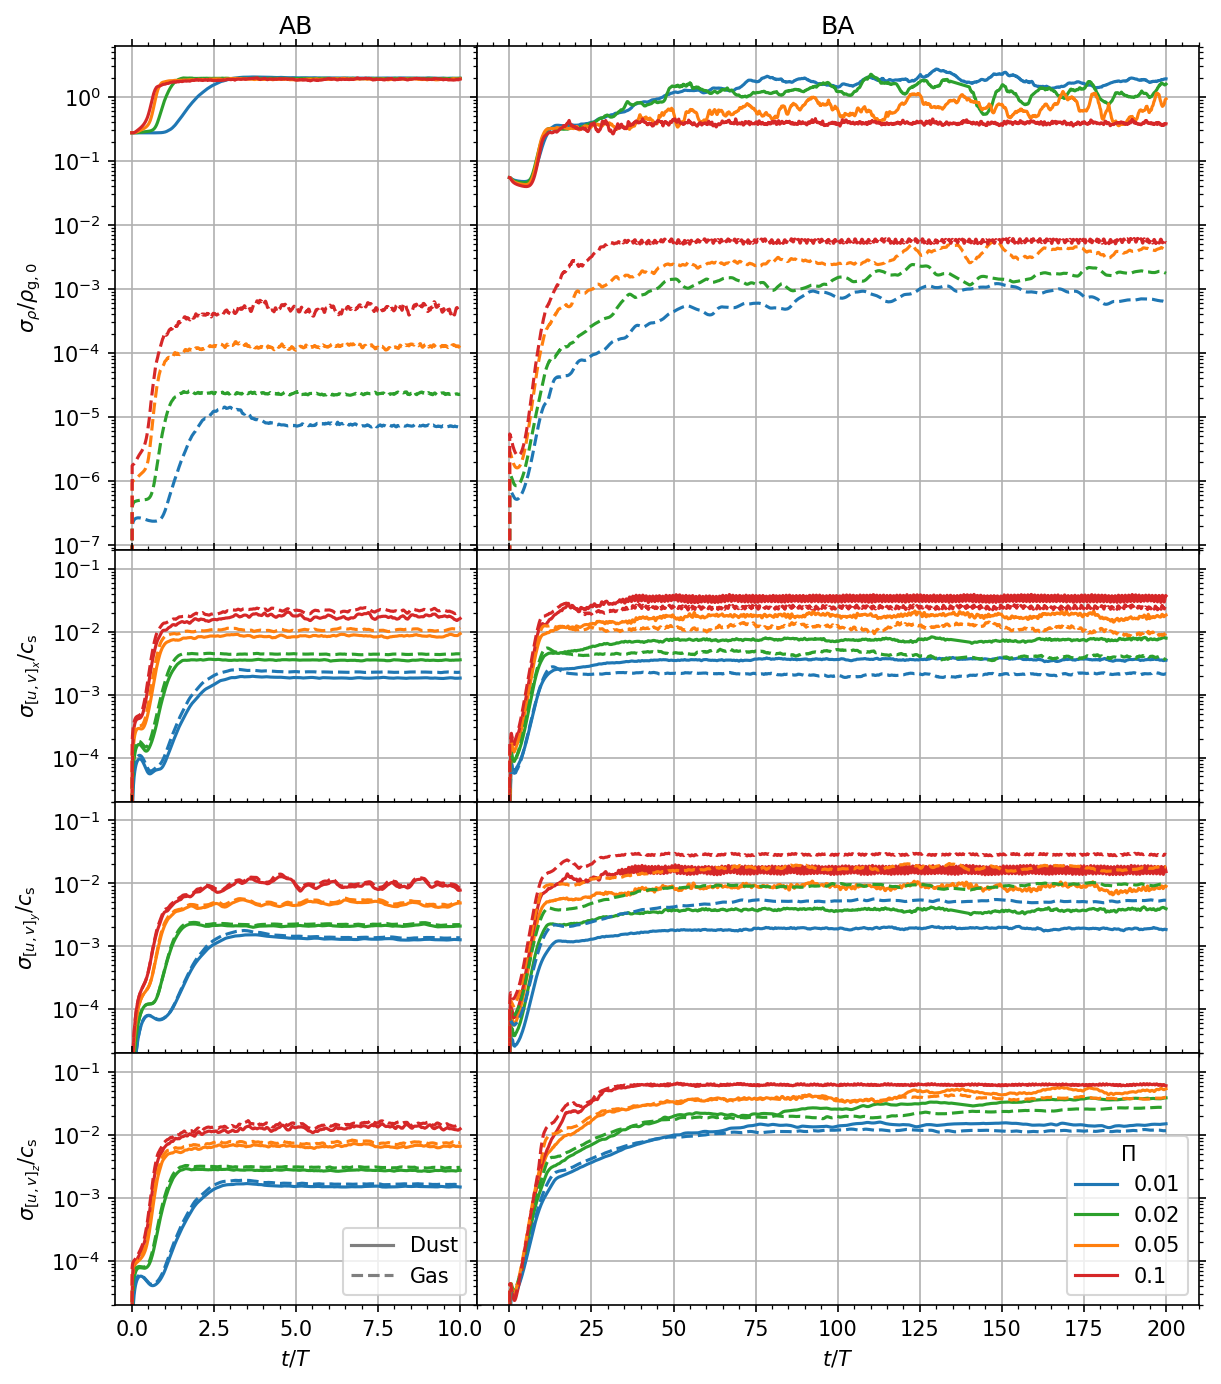

In [3]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', width_ratios=[1, 2],
                        height_ratios=[2, 1, 1, 1], figsize=(9.32, 10.9),
                        dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
vylim = (2e-5, 2e-1)
i_sat = -500
tcases, tpis = [], []
avg_sd_rhog, avg_sd_ux, avg_sd_uy, avg_sd_uz,  = [], [], [], []
err_sd_rhog, err_sd_ux, err_sd_uy, err_sd_uz,  = [], [], [], []
avg_sd_rhop, avg_sd_vx, avg_sd_vy, avg_sd_vz,  = [], [], [], []
err_sd_rhop, err_sd_vx, err_sd_vy, err_sd_vz,  = [], [], [], []
avg_Dux, avg_Duy, err_Dux, err_Duy = [], [], [], []

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi[0]}/{res}/athinput.si')
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi[0]}/{res}/output/SI.hst')

        # Compute dispersions, gas velocity deviations, and time averages
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        Dux = hst['dux']/Mg
        Duy = hst['duy']/Mg
        tcases.append(f'{case}')
        tpis.append(f'{float(Pi[0])}')

        avg_sd_rhog.append(np.mean(sd_rhog[i_sat:]))
        avg_sd_ux.append(np.mean(sd_ux[i_sat:])/c_s)
        avg_sd_uy.append(np.mean(sd_uy[i_sat:])/c_s)
        avg_sd_uz.append(np.mean(sd_uz[i_sat:])/c_s)
        avg_sd_rhop.append(np.mean(sd_rhop[i_sat:]))
        avg_sd_vx.append(np.mean(sd_vx[i_sat:])/c_s)
        avg_sd_vy.append(np.mean(sd_vy[i_sat:])/c_s)
        avg_sd_vz.append(np.mean(sd_vz[i_sat:])/c_s)
        avg_Dux.append(np.mean(Dux[i_sat:])/c_s)
        avg_Duy.append(np.mean(Duy[i_sat:])/c_s)
        err_sd_rhog.append(np.std(sd_rhog[i_sat:]))
        err_sd_ux.append(np.std(sd_ux[i_sat:])/c_s)
        err_sd_uy.append(np.std(sd_uy[i_sat:])/c_s)
        err_sd_uz.append(np.std(sd_uz[i_sat:])/c_s)
        err_sd_rhop.append(np.std(sd_rhop[i_sat:]))
        err_sd_vx.append(np.std(sd_vx[i_sat:])/c_s)
        err_sd_vy.append(np.std(sd_vy[i_sat:])/c_s)
        err_sd_vz.append(np.std(sd_vz[i_sat:])/c_s)
        err_Dux.append(np.std(Dux[i_sat:])/c_s)
        err_Duy.append(np.std(Duy[i_sat:])/c_s)

        # Plot dispersions
        axs[0][i].semilogy(hst['time'], sd_rhop, color=Pi[1],
                           label=Pi[0])
        axs[1][i].semilogy(hst['time'], sd_vx/c_s, color=Pi[1],
                           label=Pi[0])
        axs[2][i].semilogy(hst['time'], sd_vy/c_s, color=Pi[1],
                           label=Pi[0])
        axs[3][i].semilogy(hst['time'], sd_vz/c_s,
                                 color=Pi[1], label=float(Pi[0]))
        axs[0][i].semilogy(hst['time'], sd_rhog,   color=Pi[1],
                           ls='--', zorder=10)
        axs[1][i].semilogy(hst['time'], sd_ux/c_s, color=Pi[1],
                           ls='--', zorder=10)
        axs[2][i].semilogy(hst['time'], sd_uy/c_s, color=Pi[1],
                           ls='--', zorder=10)
        axs[3][i].semilogy(hst['time'], sd_uz/c_s, color=Pi[1],
                           ls='--', zorder=10)

# Plot ghost points for colorless line style and add legends
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')
axs[3, 0].legend(handles=[ls_dust, ls_gas], loc='lower right')
axs[3, 1].legend(loc='lower right', title=r'$\Pi$')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0, 0].set(title=r'AB', 
              ylabel=r'$\sigma_\rho/\rho_\mathrm{g,0}$')
axs[0, 1].set(title=r'BA')
axs[1, 0].set(ylabel=r'$\sigma_{[u,v]_x}/c_\mathrm{s}$', ylim=vylim)
axs[2, 0].set(ylabel=r'$\sigma_{[u,v]_y}/c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(ylabel=r'$\sigma_{[u,v]_z}/c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(xlabel=r'$t/T$')
axs[3, 1].set(xlabel=r'$t/T$')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('figs/dispersions.pdf', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Case' : tcases,
    'Π'    : tpis,
    '3a'   : avg_sd_rhop,
    '3b'   : err_sd_rhop,
    '4a'   : avg_sd_vx,
    '4b'   : err_sd_vx,
    '5a'   : avg_sd_vy,
    '5b'   : err_sd_vy,
    '6a'   : avg_sd_vz,
    '6b'   : err_sd_vz,
    '7a'   : avg_sd_rhog,
    '7b'   : err_sd_rhog,
    '8a'   : avg_sd_ux,
    '8b'   : err_sd_ux,
    '9a'   : avg_sd_uy,
    '9b'   : err_sd_uy,
    '10a'  : avg_sd_uz,
    '10b'  : err_sd_uz,
    # '20a'  : avg_Dux,
    # '20b'  : err_Dux,
    # '21a'  : avg_Duy,
    # '21b'  : err_Duy,
    })
s = df.style.format({
    '3a'  : '{:.3f}',
    '3b'  : '({:.0e})',
    '4a'  : '{:.3e}',
    '4b'  : '({:.0e})',
    '5a'  : '{:.3e}',
    '5b'  : '({:.0e})',
    '6a'  : '{:.3e}',
    '6b'  : '({:.0e})',
    '7a'  : '{:.3e}',
    '7b'  : '({:.0e})',
    '8a'  : '{:.3e}',
    '8b'  : '({:.0e})',
    '9a'  : '{:.3e}',
    '9b'  : '({:.0e})',
    '10a' : '{:.3e}',
    '10b' : '({:.0e})',
    # r'$\overline{\Delta u_x}$ / $\cs$'        : '{:.2e}',
    # '11'                                      : '({:.0e})',
    # r'$\overline{\Delta u_y}$ / $\cs$'        : '{:.2e}',
    # '12'                                      : '({:.0e})',
    })
# s.to_latex(buf='tabs/disps.sty')
s

## ($1\sigma$) Pandas--LaTeX Table Output (Unfinished)

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


,Case,$\Pi$,$\overline{\sigma_{\rhop}}/\rhogn$,$\overline{\sigma_{v_x}}/\cs$,$\overline{\sigma_{v_y}}/\cs$,$\overline{\sigma_{v_z}}/\cs$,$\overline{\sigma_{\rhog}}/\rhogn$,$\overline{\sigma_{u_x}}/\cs$,$\overline{\sigma_{u_y}}/\cs$,$\overline{\sigma_{u_z}}/\cs$
0,AB,0.01,1.96(1) \times 10^{0},1.83(2) \times 10^{-3},1.3(2) \times 10^{-3},1.52(1) \times 10^{-3},7.4(3) \times 10^{-6},2.27(2) \times 10^{-3},1.38(3) \times 10^{-3},1.67(2) \times 10^{-3}
1,AB,0.02,1.934(6) \times 10^{0},3.51(4) \times 10^{-3},2.11(4) \times 10^{-3},2.74(4) \times 10^{-3},2.31(7) \times 10^{-5},4.37(4) \times 10^{-3},2.25(5) \times 10^{-3},3.08(4) \times 10^{-3}
2,AB,0.05,1.88(2) \times 10^{0},8.6(2) \times 10^{-3},4.8(3) \times 10^{-3},6.7(3) \times 10^{-3},1.28(6) \times 10^{-4},1.07(3) \times 10^{-2},5.1(3) \times 10^{-3},7.6(3) \times 10^{-3}
3,AB,0.10,1.88(4) \times 10^{0},1.7(1) \times 10^{-2},9.2(9) \times 10^{-3},1.32(8) \times 10^{-2},4.9(5) \times 10^{-4},2.1(1) \times 10^{-2},1.00(9) \times 10^{-2},1.5(9) \times 10^{-2}
4,BA,0.01,1.7(2) \times 10^{0},3.6(1) \times 10^{-3},1.91(6) \times 10^{-3},1.46(6) \times 10^{-2},8.(2) \times 10^{-4},2.12(5) \times 10^{-3},5.2(1) \times 10^{-3},1.17(2) \times 10^{-2}
5,BA,0.02,1.3(4) \times 10^{0},7.3(4) \times 10^{-3},3.7(2) \times 10^{-3},3.2(2) \times 10^{-2},1.7(3) \times 10^{-3},4.0(3) \times 10^{-3},9.1(5) \times 10^{-3},2.2(2) \times 10^{-2}
6,BA,0.05,7.(2) \times 10^{-1},1.7(1) \times 10^{-2},8.4(8) \times 10^{-3},5.0(4) \times 10^{-2},3.8(5) \times 10^{-3},1.0(1) \times 10^{-2},1.7(1) \times 10^{-2},3.9(1) \times 10^{-2}
7,BA,0.10,3.9(2) \times 10^{-1},3.4(3) \times 10^{-2},1.6(2) \times 10^{-2},6.33(9) \times 10^{-2},5.6(3) \times 10^{-3},2.45(10) \times 10^{-2},2.88(5) \times 10^{-2},6.3(1) \times 10^{-2}


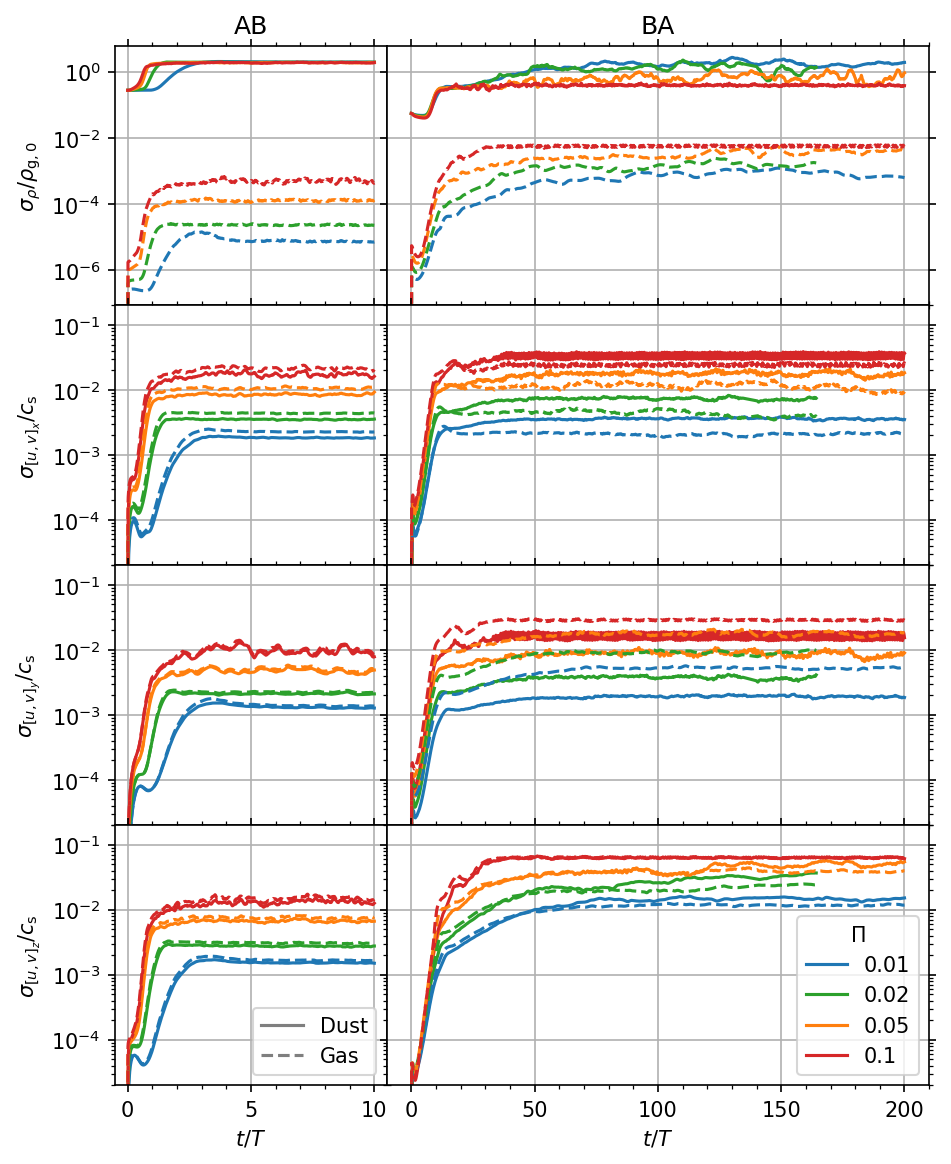

In [ ]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def std_err_par(val, err, dec_not=False):
    """
    Formats value-error pair using parenthesis notation.

    *** scientific notation in TeX.

    Parameters
    ----------
    val : float
        ***
    err : float
        ***
    dec_not : bool, optional
        If False, 

    Returns
    -------
    entry
        ***
    """
    val_str, err_str = f'{val:e}', f'{err:e}'
    val_exp, err_exp = int(val_str[-3:]), int(err_str[-3:])
    exp_diff = val_exp - err_exp
    if exp_diff >= 0:
        lsf = 3 + exp_diff
        val_sig = float(val_str[:lsf])
        val_sig = np.format_float_positional(val_sig, precision=exp_diff)
    else: raise Exception('std. err. greater than value')
    err_sig = float(err_str[:-4])
    err_1st = int(float(np.format_float_positional(err_sig, precision=0)))
    exp_str = '{' + str(val_exp) + '}'
    return f'{val_sig}({err_1st}) \\times 10^{exp_str}'

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', width_ratios=[1,2],
                        figsize=(7, 9), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
psi = 0 # 4 # Plot starting index
vylim = (2e-5, 2e-1)
cols = [[], [], [], [], [], [], [], [], [], [], [], []]
i_sat = -500

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi[0]}/{res}/athinput.si')
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi[0]}/{res}/output/SI.hst')

        # Compute dispersions, gas velocity deviations, and time averages
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        Dux = hst['dux']/Mg
        Duy = hst['duy']/Mg

        for j, col in enumerate(cols):
            if j == 0:
                col.append(case)
            elif j == 1:
                col.append(float(Pi[0]))
            elif j == 2:
                avg = np.mean(sd_rhop[i_sat:])
                err = np.std(sd_rhop[i_sat:])
                col.append(std_err_par(avg, err))
            elif j == 3:
                avg = np.mean(sd_vx[i_sat:])/c_s
                err = np.std(sd_vx[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 4:
                avg = np.mean(sd_vy[i_sat:])/c_s
                err = np.std(sd_vy[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 5:
                avg = np.mean(sd_vz[i_sat:])/c_s
                err = np.std(sd_vz[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 6:
                avg = np.mean(sd_rhog[i_sat:])
                err = np.std(sd_rhog[i_sat:])
                col.append(std_err_par(avg, err, dec_not=True))
            elif j == 7:
                avg = np.mean(sd_ux[i_sat:])/c_s
                err = np.std(sd_ux[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 8:
                avg = np.mean(sd_uy[i_sat:])/c_s
                err = np.std(sd_uy[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 9:
                avg = np.mean(sd_uz[i_sat:])/c_s
                err = np.std(sd_uz[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 10:
                avg = np.mean(Dux[i_sat:])/c_s
                err = np.std(Dux[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 11:
                avg = np.mean(Duy[i_sat:])/c_s
                err = np.std(Duy[i_sat:])/c_s
                col.append(std_err_par(avg, err))

        # Plot dispersions
        axs[0][i].semilogy(hst['time'][psi:], sd_rhop[psi:], color=Pi[1],
                           label=Pi[0])
        axs[1][i].semilogy(hst['time'][psi:], sd_vx[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[2][i].semilogy(hst['time'][psi:], sd_vy[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[3][i].semilogy(hst['time'][psi:], sd_vz[psi:]/c_s,
                                 color=Pi[1], label=float(Pi[0]))
        axs[0][i].semilogy(hst['time'][psi:], sd_rhog[psi:],   color=Pi[1],
                           ls='--', zorder=10)
        axs[1][i].semilogy(hst['time'][psi:], sd_ux[psi:]/c_s, color=Pi[1],
                           ls='--', zorder=10)
        axs[2][i].semilogy(hst['time'][psi:], sd_uy[psi:]/c_s, color=Pi[1],
                           ls='--', zorder=10)
        axs[3][i].semilogy(hst['time'][psi:], sd_uz[psi:]/c_s, color=Pi[1],
                           ls='--', zorder=10)

# Plot ghost points for colorless line style and add legends
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')
axs[3, 0].legend(handles=[ls_dust, ls_gas], loc='lower right')
axs[3, 1].legend(loc='lower right', title=r'$\Pi$')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0, 0].set(title=r'AB', 
              ylabel=r'$\sigma_\rho/\rho_\mathrm{g,0}$')
axs[0, 1].set(title=r'BA')
axs[1, 0].set(ylabel=r'$\sigma_{[u,v]_x}/c_\mathrm{s}$', ylim=vylim)
axs[2, 0].set(ylabel=r'$\sigma_{[u,v]_y}/c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(ylabel=r'$\sigma_{[u,v]_z}/c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(xlabel=r'$t/T$')
axs[3, 1].set(xlabel=r'$t/T$')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('figs/dispersions.pdf', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Case'                                : cols[0],
    r'$\Pi$'                              : cols[1],
    r'$\overline{\sigma_{\rhop}}/\rhogn$' : cols[2],
    r'$\overline{\sigma_{v_x}}/\cs$'      : cols[3],
    r'$\overline{\sigma_{v_y}}/\cs$'      : cols[4],
    r'$\overline{\sigma_{v_z}}/\cs$'      : cols[5],
    r'$\overline{\sigma_{\rhog}}/\rhogn$' : cols[6],
    r'$\overline{\sigma_{u_x}}/\cs$'      : cols[7],
    r'$\overline{\sigma_{u_y}}/\cs$'      : cols[8],
    r'$\overline{\sigma_{u_z}}/\cs$'      : cols[9],
    # r'$\overline{\Delta u_x}/\cs$'        : cols[10],
    # r'$\overline{\Delta u_y}/\cs$'        : cols[11],
    })
# df.to_latex(buf='tabs/disps.sty')
df

In [ ]:
def std_err_par(val, err, base_exp, dec_not=False):
    """
    Formats value-error pair using parenthesis notation.

    *** scientific notation in TeX.

    Parameters
    ----------
    val : float
        ***
    err : float
        ***
    base_exp : int
        ***
    dec_not : bool, optional
        If False, 

    Returns
    -------
    entry
        ***
    """
    val_str, err_str = f'{val:e}', f'{err:e}'
    val_exp, err_exp = int(val_str[-3:]), int(err_str[-3:])
    exp_diff = val_exp - err_exp
    if exp_diff >= 0:
        lsf = 3 + exp_diff
        val_sig = float(val_str[:lsf])
        val_sig = np.format_float_positional(val_sig, precision=exp_diff)
    else: raise Exception('std. err. greater than value')
    err_sig = float(err_str[:-4])
    err_1st = int(float(np.format_float_positional(err_sig, precision=0)))
    exp_str = '{' + str(val_exp) + '}'
    if dec_not:
        return f'{val_sig}({err_1st})'
    else:
        return f'${val_sig}({err_1st})\\times 10^{exp_str}$'

vals = [1.23456789e0, 2.345678901e9, 1.8494637e-03]#, 9.876543210e-04]
errs = [5.678901234e-2, 9.012345678e6, 2.345816e-05]#, 5.678901234e-03]
for i, val in enumerate(vals):
    print(std_err_par(val, errs[i]))

TypeError: std_err_par() missing 1 required positional argument: 'base_exp'

In [ ]:
import numpy as np

vals = [1.23456789e0, 2.345678901e9, 1.8494637e-03]#, 9.876543210e-04]
errs = [5.678901234e-2, 9.012345678e6, 2.345816e-05]#, 5.678901234e-03]
for i, val in enumerate(vals):
    val_str, err_str = f'{val:e}', f'{errs[i]:e}'
    val_exp, err_exp = int(val_str[-3:]), int(err_str[-3:])
    exp_diff = val_exp - err_exp
    if exp_diff > 0:
        lsf = 3 + exp_diff
        val_sig = float(val_str[:lsf])
        val_sig = np.format_float_positional(val_sig, precision=exp_diff)
    else: raise Exception('std. err. greater than value')
    err_sig = float(err_str[:-4])
    err_1st = int(float(np.format_float_positional(err_sig, precision=0)))
    exp_str = '{' + str(val_exp) + '}'
    print(f'{val:e} ± {errs[i]:e} ≈ {val_sig}({err_1st}) \\times 10^{exp_str}')

1.234568e+00 ± 5.678901e-02 ≈ 1.23(6) \times 10^{0}
2.345679e+09 ± 9.012346e+06 ≈ 2.346(9) \times 10^{9}
1.849464e-03 ± 2.345816e-05 ≈ 1.85(2) \times 10^{-3}
